In [55]:
%cd /Users/Brett/Code/bricolage-dev/
from bricolage import lineage, threshold3, graph
from bricolage.analysis_ext import CausalFlowAnalyzer, Information, MutualInfoAnalyzer

/Users/Brett/Dropbox/Code/bricolage-dev


In [32]:
%matplotlib inline
%cd "/Users/Brett/Dropbox/SimulationOutput/three/"
import pandas as pd
import seaborn as sb
import numpy as np

/Users/Brett/Dropbox/SimulationOutput/three


In [80]:
treat = lineage.Treatment("/Users/Brett/Desktop/three/03-(a-and-b)-or-(a-and-not-c)-or-(b-and-not-c)/")
rep01 = treat.replicates[1]
lin01 = rep01.get_lineage()
print lin01.generation
def cat_env(a, b, c):
    if (a and b) or (a and not c) or (b and not c):
    #if (a and not c) or (b and c):
        return 1
    return 0

50000


In [81]:
net01 = lin01.population.get_best()[0]
graph.save_network_as_fullgraph(net01)
%pwd

saving 3192892


u'/Users/Brett/Dropbox/Code/bricolage-dev'

In [82]:
anc = lin01.get_ancestry(net01.identifier)

In [83]:
lin01.targets

In [84]:
cf = CausalFlowAnalyzer(lin01.world, [0, .5, .25])
mf = MutualInfoAnalyzer(lin01.world, cat_env)

In [85]:
joint = cf.analyse_collection(anc)
jointm = mf.analyse_collection(anc)
inf = Information(joint)
infm = Information(jointm)

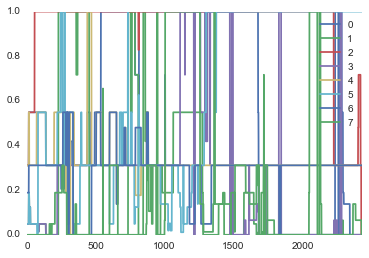

In [88]:
arr = np.asarray(infm)
arr.shape = arr.shape[0], arr.shape[1]
pd.DataFrame(arr).plot()

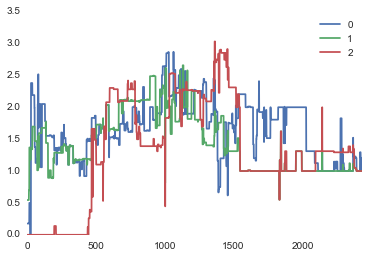

In [95]:
arr = np.asarray(inf)
summed = arr.sum(axis=1)
#summed = summed.sum(axis=1) / 3
pd.DataFrame(summed).plot()

In [96]:
arr[-1]

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])